In [1]:
import os
import cv2
import csv
import glob
import pandas as pd
import numpy as np
import random
import itertools
from collections import Counter
from math import ceil
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
train_path = '/home/dreamer/Private/Competition/datafountain/StealCounting/train_labels.csv'
train_csv = pd.read_csv(train_path)
train_csv.head()

,ID,Detection,AB
0,DBA90206.jpg,311 707 472 842,NaN
1,DBA90206.jpg,351 631 452 721,NaN
2,DBA90206.jpg,438 473 519 563,NaN
3,DBA90206.jpg,420 553 557 688,NaN
4,DBA90206.jpg,501 446 641 607,NaN


In [3]:
train_csv['ID'].nunique()

250

In [4]:
train_csv.columns

Index(['ID', ' Detection', 'AB'], dtype='object')

In [5]:
train_csv.groupby('ID')['AB'].value_counts().unstack()

AB
ID


Text(0.5, 1.0, 'Distribution of Source')

No handles with labels found to put in legend.


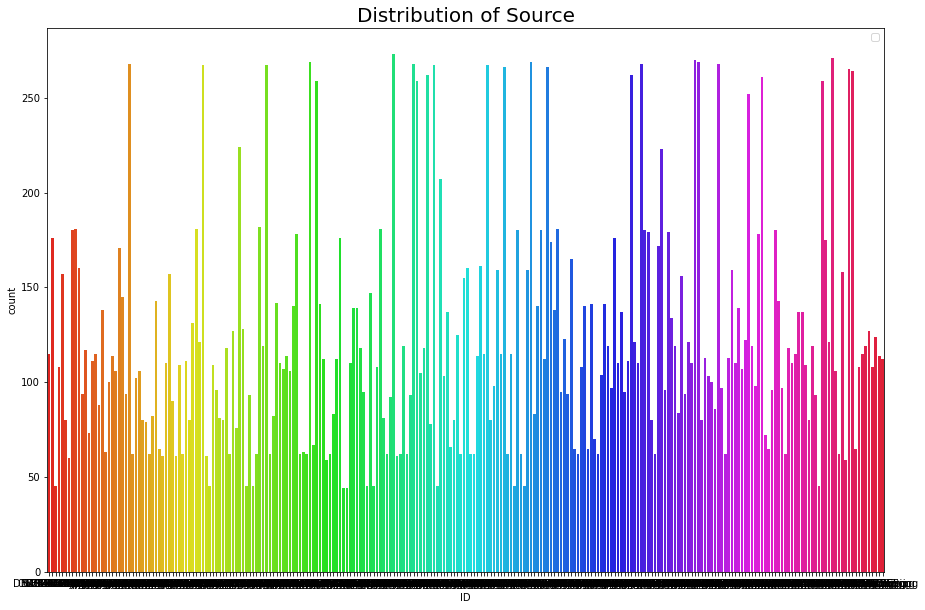

In [6]:
import seaborn as sns
# train_csv['ID'].value_counts()
#sns.distplot(train_csv['ID'].unique())
# warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (18, 8)
plt.rcParams['figure.figsize'] = (15, 10)
sns.countplot(train_csv['ID'], palette = 'hsv')
plt.title('Distribution of Source', fontsize = 20)
plt.legend()
plt.show()

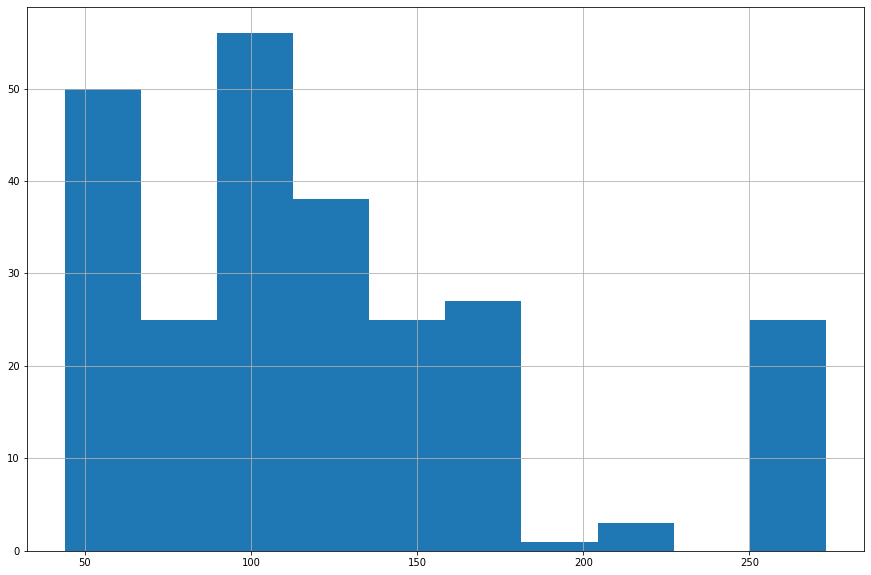

In [7]:
train_csv['ID'].value_counts().hist()

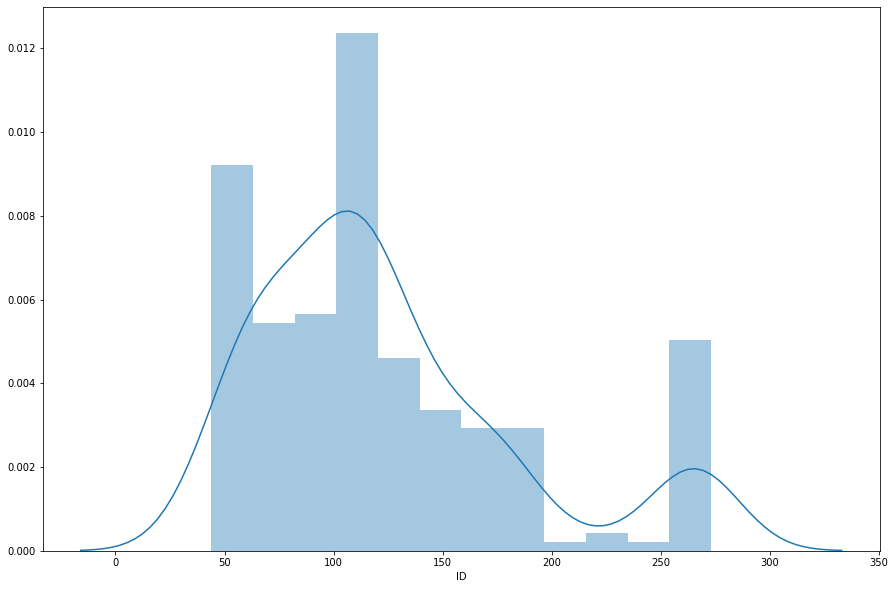

In [8]:
sns.distplot(train_csv['ID'].value_counts())

CC61344D.jpg
5BCDAEB8.jpg
D0D2EED9.jpg
C2871199.jpg
99E783B2.jpg
8DF7800C.jpg
C85E0C57.jpg
2A7090FC.jpg
5BCDAEB8.jpg
C2A82415.jpg
0EAC74AF.jpg
5BCDAEB8.jpg
CC61344D.jpg
5BCDAEB8.jpg
D0D2EED9.jpg
C2871199.jpg
99E783B2.jpg
8DF7800C.jpg
C85E0C57.jpg
2A7090FC.jpg
5BCDAEB8.jpg
C2A82415.jpg
0EAC74AF.jpg
5BCDAEB8.jpg


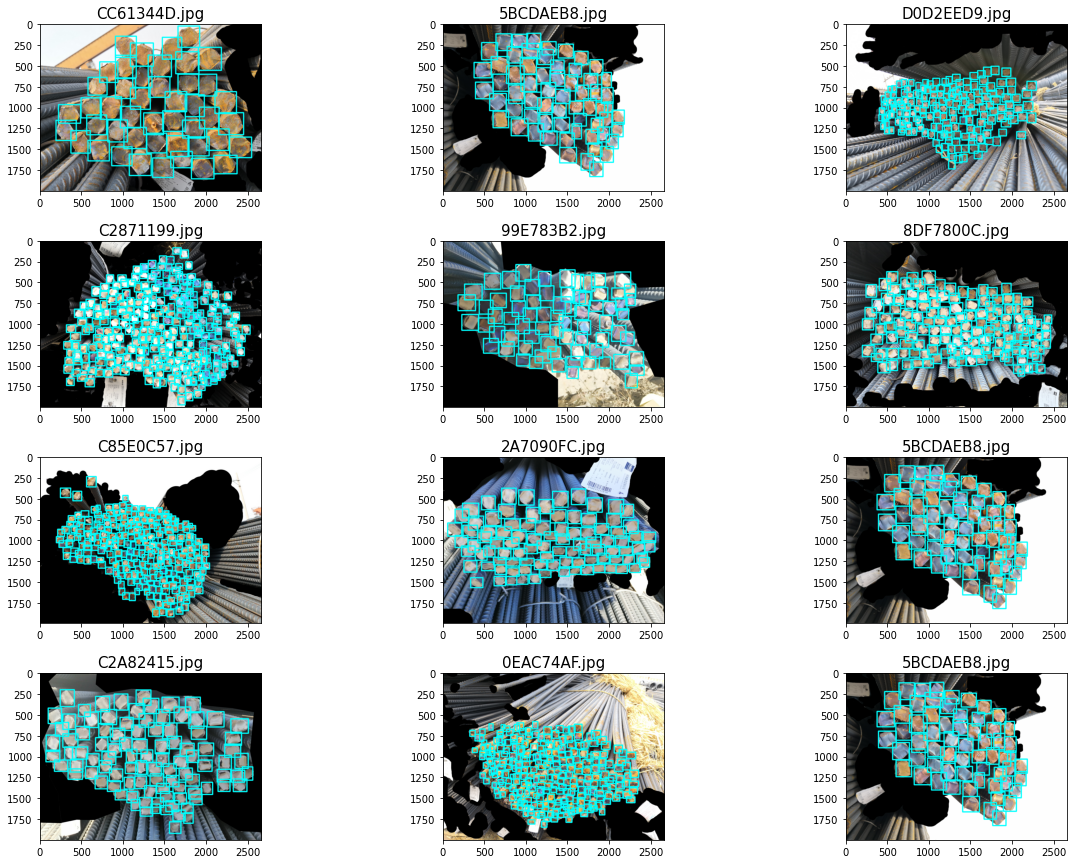

In [9]:
import matplotlib.pyplot as plt
image_folder = '/home/dreamer/Private/Competition/datafountain/StealCounting/train_dataset'

def decode(bbox):train_txtx_file
    bboxes = []
#     print(bbox)
    for b in bbox:
       
        de_b = [float(coord.rstrip()) for coord in b.split()]
#         print("de_b: ", de_b)
        bboxes.append(de_b)
    return bboxes
            
def draw_rect(img, bboxes, color=(0, 255,255)):
    img = img.copy()

    for bbox in bboxes:
        pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
        pt1 = int(pt1[0]), int(pt1[1])
        pt2 = int(pt2[0]), int(pt2[1])
        img = cv2.rectangle(img.copy(), pt1, pt2, color, int(max(img.shape[:2]) / 200))
    return img


def plot_multiple_img(img_matrix_list, img_list, ncols, main_title=""):
    fig, myaxes = plt.subplots(figsize=(20, 15), nrows=ceil(len(img_matrix_list) / ncols), ncols=ncols, squeeze=False)
    fig.suptitle(main_title, fontsize = 30)
    fig.subplots_adjust(wspace=0.3)
    fig.subplots_adjust(hspace=0.3)
    for i, (img, title) in enumerate(zip(img_matrix_list, img_list)):
        myaxes[i // ncols][i % ncols].imshow(img)
        myaxes[i // ncols][i % ncols].set_title(title, fontsize=15)
    plt.show()
    
image_file_list = np.random.choice(os.listdir(image_folder), 12)

img_list = []
bboxes_list = []
# bbox_list = list(train_csv[train_csv['ID']==image_list[0]][' Detection'])
# print(bbox_list[0].split())
for image_file in image_file_list:
    #img = cv2.imread(os.path.join(image_folder, image))[:,:,::-1] 
    img_list.append(image_file)
    print(image_file)
    bboxes = list(train_csv[train_csv['ID']==image_file][' Detection'])
    
    bboxes = decode(bboxes)

    bboxes_list.append(bboxes)
# print(bboxes_list)

img_matrix_list = []
for image_file, bboxes in zip(img_list, bboxes_list):
    print(image_file)
    img = cv2.imread(os.path.join(image_folder, image_file))[:,:,::-1]

    image = draw_rect(img, bboxes)
    img_matrix_list.append(image)
#     plt.figure('0')
#     plt.figure('0')
#     plt.imshow(image)
#     plt.show()

plot_multiple_img(img_matrix_list, img_list, 3)


In [27]:
train_csv['ID'].unique()

array(['DBA90206.jpg', '0009496A.jpg', '52575287.jpg', '6B898244.jpg',
       'DCCA8144.jpg', 'E46D744F.jpg', '03CF22F1.jpg', 'B943B927.jpg',
       '41CF3100.jpg', '1E5FB1FF.jpg', '8ADCAE58.jpg', 'D6378505.jpg',
       '7E0BEC70.jpg', 'E42F504E.jpg', 'CD496125.jpg', 'A6EE237B.jpg',
       'C39C9B97.jpg', '8D9FAC03.jpg', 'CCF6E9EE.jpg', '8343D02C.jpg',
       '08F7E2BB.jpg', '550E6EB2.jpg', '13641B22.jpg', 'A3EEA8A1.jpg',
       'CE4841E1.jpg', '638FA776.jpg', 'E8A7BB7D.jpg', 'E05ABCF0.jpg',
       'ABB2195A.jpg', 'BB917D5A.jpg', 'B905D0AB.jpg', 'F766C97D.jpg',
       '92A107D5.jpg', '2FDC9E0E.jpg', '36A7E5D4.jpg', '7EBD1524.jpg',
       '4463FA64.jpg', 'A1A37A49.jpg', '7421D3CD.jpg', '0C7CB7B9.jpg',
       'D2B83E2C.jpg', '4976E3AB.jpg', '9D496EBE.jpg', '2A35EC79.jpg',
       '0BFB817C.jpg', 'E802A308.jpg', '1B82FF85.jpg', 'BB32A6B9.jpg',
       '4718DA7F.jpg', 'B7DC39A4.jpg', '1EFC66A0.jpg', '9D46BC0C.jpg',
       'A49FFA35.jpg', 'DFE17F7D.jpg', 'A8658634.jpg', 'B3C96BEB.jpg',
      

In [32]:
# get image area 

  

def get_shape(img_ID, image_folder='/home/dreamer/Private/Competition/datafountain/StealCounting/train_dataset'):
    img = cv2.imread(os.path.join(image_folder, img_ID))
    height, width = img.shape[:2]
    return height, width
img_shape_dict = dict()

img_list = list(train_csv['ID'].unique())
for img_ID in img_list:
    height, width = get_shape(img_ID)
    wh_dict = dict()
    wh_dict['height'] = height
    wh_dict['width'] = width
    img_shape_dict[img_ID] = wh_dict

#img_shape_dict
def get_wh(img_ID, img_shape_dict, value_t):
#     print(img_ID)
#     print(img_shape_dict)
#     print(img_shape_dict[img_ID])
    value = img_shape_dict[img_ID][value_t]
    return value #height, width

value_ts = ['height', 'width']
for value_t in value_ts:
    train_csv[value_t] = train_csv.apply(lambda row: get_wh(row['ID'], img_shape_dict, value_t), axis=1)

#train_csv['width'] = train_csv.apply(lambda row: get_wh(row['ID'], img_shape_dict, 'width'), axis=1)
train_csv.head()

,ID,Detection,AB,height,width
0,DBA90206.jpg,311 707 472 842,NaN,2000,2666
1,DBA90206.jpg,351 631 452 721,NaN,2000,2666
2,DBA90206.jpg,438 473 519 563,NaN,2000,2666
3,DBA90206.jpg,420 553 557 688,NaN,2000,2666
4,DBA90206.jpg,501 446 641 607,NaN,2000,2666


In [44]:
# get center_x, and center_y
# for this csv file ,the bbox stype is :
# x1, y1, x2, y2

from ast import literal_eval

def get_bbox_area(bbox):
    bbox = literal_eval(bbox)
    return float(bbox[2]) * float(bbox[3])

def get_center_ratio(bbox, woh, index):
#     bbox = literalabs_eval(bbox)
    bbox = [float(b) for b in bbox.split()]
    if int(index) <=1:
        return float(bbox[int(index)] + bbox[int(index)+2]) /(float(woh) * 2)
    else:
                          
        return float(bbox[int(index)] - bbox[int(index)-2]) /float(woh)


  
center_ts = {'center_x': '0-width', 'center_y': '1-height', 'w_ratio': '2-width', 'h_ratio': '3-height'}
for center_t in center_ts.keys():
    train_csv[center_t] = train_csv.apply(lambda row: get_center_ratio(row[' Detection'], row[center_ts[center_t].split('-')[-1]], center_ts[center_t].split('-')[0]), axis=1)
train_csv.head()


,ID,Detection,AB,height,width,center_x,center_y,w_ratio,h_ratio
0,DBA90206.jpg,311 707 472 842,NaN,2000,2666,0.146849,0.38725,0.060390,0.0675
1,DBA90206.jpg,351 631 452 721,NaN,2000,2666,0.150600,0.33800,0.037884,0.0450
2,DBA90206.jpg,438 473 519 563,NaN,2000,2666,0.179482,0.25900,0.030383,0.0450
3,DBA90206.jpg,420 553 557 688,NaN,2000,2666,0.183233,0.31025,0.051388,0.0675
4,DBA90206.jpg,501 446 641 607,NaN,2000,2666,0.214179,0.26325,0.052513,0.0805


In [69]:
label_folder = '/home/dreamer/Private/Competition/datafountain/StealCounting/labels/train'

for img_file in img_list:
    list_file = open(os.path.join(label_folder, img_file.split('.')[0]+'.txt'), 'w')
    bb_info = train_csv[train_csv['ID']==img_file]
    print(list(bb_info['h_ratio'])[0])
    for center_x, center_y, w_ratio, h_ratio in zip(list(bb_info['center_x']), list(bb_info['center_y']), list(bb_info['w_ratio']), list(bb_info['h_ratio'])):
        bb = '0 ' + str(center_x) + ' ' + str(center_y) + ' ' + str(w_ratio) + ' ' + str(h_ratio) + '\n'
        print(bb)
#         center_x, center_y, w_ratio, h_ratio)
        list_file.writelines(bb)
#     center_x = bb_info['center_x']
#     center_y = bb_info['center_y']
#     w_ratio = bb_info['w_ratio']
#     h_ratio = bb_info['h_ratio']
#     bb = center_x + ' ' + center_y + ' ' + w_ratio + ' ' + h_ratio + '\n'
#     print(bb)

0.0675
0 0.14684921230307577 0.38725 0.0603900975243811 0.0675

0 0.15060015003750937 0.338 0.03788447111777944 0.045

0 0.17948237059264815 0.259 0.030382595648912228 0.045

0 0.18323330832708176 0.31025 0.05138784696174044 0.0675

0 0.21417854463615904 0.26325 0.05251312828207052 0.0805

0 0.25525131282820707 0.2295 0.05888972243060765 0.089

0 0.3304576144036009 0.25975 0.05401350337584396 0.0835

0 0.2946361590397599 0.32225 0.05738934733683421 0.0765

0 0.23987246811702925 0.3475 0.059639909977494375 0.086

0 0.2154913728432108 0.40425 0.05138784696174044 0.0755

0 0.1888597149287322 0.45575 0.055138784696174045 0.0665

0 0.28769692423105775 0.3915 0.060765191297824456 0.07

0 0.23987246811702925 0.48225 0.056639159789947484 0.0765

0 0.1761065266316579 0.52225 0.05738934733683421 0.0755

0 0.2524381095273818 0.5435 0.047261815453863466 0.072

0 0.20086271567891972 0.609 0.05288822205551388 0.069

0 0.25431357839459867 0.6405 0.04951237809452363 0.064

0 0.2938859714928732 0.6955 

0 0.5643285821455364 0.61275 0.07914478619654913 0.0875

0 0.6089647411852963 0.4985 0.08514628657164292 0.114

0 0.6438484621155289 0.38225 0.09039759939984997 0.1305

0 0.6896099024756189 0.2995 0.08439609902475619 0.119

0 0.7138034508627157 0.20025 0.08027006751687922 0.1095

0 0.7764441110277569 0.2305 0.07576894223555888 0.11

0 0.7590022505626407 0.3315 0.07914478619654913 0.107

0 0.8692798199549887 0.316 0.08514628657164292 0.111

0 0.7072393098274569 0.4045 0.08214553638409602 0.105

0 0.7004876219054764 0.52175 0.08139534883720931 0.1045

0 0.704801200300075 0.5995 0.08777194298574643 0.09

0 0.6393473368342085 0.652 0.0708927231807952 0.104

0 0.7034883720930233 0.71625 0.07689422355588897 0.0865

0 0.6611027756939235 0.77675 0.07689422355588897 0.0925

0 0.7830082520630157 0.77025 0.07839459864966242 0.1025

0 0.8377719429857464 0.706 0.08514628657164292 0.101

0 0.7807576894223556 0.6765 0.08514628657164292 0.099

0 0.9144786196549137 0.65025 0.08627156789197299 0.0905

0

0.064
0 0.3954358398802843 0.947 0.04414515525626637 0.064

0 0.4384586606808829 0.93075 0.04489337822671156 0.0605

0 0.4781144781144781 0.927 0.03591470258136925 0.047

0 0.5220725776281332 0.931 0.033295922184811075 0.061

0 0.3658810325476992 0.911 0.04713804713804714 0.06

0 0.4047886270108492 0.8795 0.038159371492704826 0.063

0 0.46258885147774037 0.87775 0.03853348297792742 0.0585

0 0.49588477366255146 0.861 0.03254769921436588 0.05

0 0.5417134306023195 0.878 0.03741114852225964 0.058

0 0.5282454171343061 0.817 0.04040404040404041 0.056

0 0.4878413767302656 0.8145 0.038159371492704826 0.058

0 0.44089038533482977 0.827 0.040778151889263 0.054

0 0.3778526000748223 0.82 0.04489337822671156 0.052

0 0.34081556303778526 0.851 0.038159371492704826 0.061

0 0.345679012345679 0.7895 0.04564160119715675 0.046

0 0.4171343060231949 0.7885 0.04713804713804714 0.058

0 0.4558548447437336 0.77275 0.04152637485970819 0.0515

0 0.49513655069210627 0.76425 0.036288814066591846 0.0605

0 

0.0535
0 0.4214365881032548 0.10175 0.03928170594837262 0.0535

0 0.4678264122708567 0.06725 0.037037037037037035 0.0555

0 0.500561167227834 0.047 0.04339693228582117 0.049

0 0.5028058361391695 0.0935 0.04264870931537598 0.057

0 0.547699214365881 0.08775 0.03965581743359521 0.0605

0 0.5682753460531238 0.113 0.04339693228582117 0.063

0 0.6073699962588851 0.10325 0.04302282080059858 0.0545

0 0.6068088290310513 0.146 0.04564160119715675 0.05

0 0.6651702207257763 0.1525 0.04489337822671156 0.052

0 0.6249532360643472 0.198 0.04152637485970819 0.063

0 0.6174710063598953 0.2565 0.04377104377104377 0.051

0 0.6582491582491582 0.2425 0.04152637485970819 0.047

0 0.5809951365506921 0.245 0.03591470258136925 0.044

0 0.5606060606060606 0.172 0.03853348297792742 0.061

0 0.5454545454545454 0.24125 0.041900486344930786 0.0545

0 0.5157126823793491 0.211 0.040029928918817806 0.062

0 0.5013093901982791 0.14325 0.04564160119715675 0.0615

0 0.46371118593340815 0.1365 0.040029928918817806 0.0

0.036
0 0.05870217554388597 0.6715 0.037134283570892726 0.036

0 0.06301575393848462 0.7135 0.028507126781695424 0.04

0 0.07726931732933233 0.75075 0.024756189047261814 0.0415

0 0.07726931732933233 0.6155 0.03150787696924231 0.038

0 0.08814703675918979 0.646 0.033008252063015754 0.042

0 0.11796699174793698 0.67675 0.03188297074268567 0.0455

0 0.10183795948987247 0.68525 0.02138034508627157 0.0355

0 0.1168417104276069 0.717 0.03188297074268567 0.042

0 0.14722430607651912 0.7475 0.03338334583645911 0.042

0 0.14609902475618905 0.698 0.03113278319579895 0.035

0 0.15360090022505626 0.683 0.034133533383345835 0.043

0 0.12809452363090773 0.6305 0.03113278319579895 0.044

0 0.1177794448612153 0.5925 0.030007501875468866 0.033

0 0.14122280570142537 0.55525 0.03338334583645911 0.0455

0 0.14966241560390098 0.57625 0.03075768942235559 0.0275

0 0.1571642910727682 0.606 0.0345086271567892 0.046

0 0.11159039759939984 0.49125 0.03488372093023256 0.0405

0 0.15772693173293323 0.5225 0.035

0.07
0 0.0555138784696174 0.376 0.05476369092273068 0.07

0 0.08702175543885972 0.3345 0.06001500375093773 0.068

0 0.11740435108777195 0.40025 0.05101275318829707 0.0705

0 0.10502625656414104 0.4285 0.05476369092273068 0.064

0 0.16166541635408851 0.444 0.05476369092273068 0.066

0 0.21192798199549887 0.47325 0.05701425356339085 0.0665

0 0.22111777944486122 0.397 0.05588897224306077 0.072

0 0.27344336084021004 0.446 0.0555138784696174 0.07

0 0.15941485371342837 0.3565 0.0555138784696174 0.079

0 0.19617404351087772 0.32175 0.060765191297824456 0.0695

0 0.15003750937734434 0.25175 0.0622655663915979 0.0785

0 0.18192048012003 0.17125 0.06151537884471118 0.0945

0 0.26650412603150786 0.1985 0.055138784696174045 0.085

0 0.32333083270817703 0.2475 0.060765191297824456 0.072

0 0.3516504126031508 0.171 0.0603900975243811 0.088

0 0.40585146286571644 0.233 0.06301575393848462 0.082

0 0.4118529632408102 0.15875 0.06001500375093773 0.0875

0 0.4696174043510878 0.205 0.05776444111027757

0.057
0 0.11496624156039009 0.2205 0.046136534133533386 0.057

0 0.16785446361590398 0.2395 0.03938484621155289 0.057

0 0.23124531132783196 0.154 0.043135783945986494 0.062

0 0.38484621155288823 0.2545 0.023255813953488372 0.037

0 0.09508627156789197 0.45925 0.03113278319579895 0.0415

0 0.11515378844711177 0.44175 0.03225806451612903 0.0405

0 0.13540885221305327 0.4085 0.029257314328582147 0.033

0 0.14309827456864216 0.377 0.03188297074268567 0.04

0 0.1646661665416354 0.40775 0.02625656414103526 0.0315

0 0.18192048012003 0.419 0.03075768942235559 0.036

0 0.15341335333833458 0.4385 0.02700675168792198 0.039

0 0.1714178544636159 0.3555 0.0277569392348087 0.038

0 0.18567141785446362 0.38025 0.03075768942235559 0.0385

0 0.20273818454613654 0.347 0.034133533383345835 0.038

0 0.21849212303075768 0.385 0.03338334583645911 0.046

0 0.2166166541635409 0.42775 0.03563390847711928 0.0395

0 0.2423105776444111 0.449 0.030007501875468866 0.036

0 0.17929482370592648 0.458 0.03525881470


0 0.2343808454919566 0.4975 0.06247661803217359 0.064

0 0.20613542835765059 0.56375 0.048634493078937524 0.0785

0 0.17919940142162363 0.6305 0.06584362139917696 0.074

0 0.2719790497568275 0.682 0.05387205387205387 0.078

0 0.3221099887766554 0.72275 0.055368499812944255 0.0845

0 0.3875794986906098 0.7775 0.058361391694725026 0.081

0 0.4401421623643846 0.6805 0.0512532734754957 0.065

0 0.48166853722409275 0.641 0.056490834268612046 0.075

0 0.5306771417882529 0.61825 0.05499438832772166 0.0795

0 0.5273101384212495 0.51475 0.0512532734754957 0.0725

0 0.5819304152637486 0.3875 0.050505050505050504 0.065

0 0.632996632996633 0.3725 0.04638982416760194 0.067

0 0.6657313879536102 0.35925 0.04526748971193416 0.0695

0 0.675645342312009 0.4255 0.04788627010849233 0.067

0 0.6328095772540216 0.44425 0.053497942386831275 0.0605

0 0.5895997007108118 0.4505 0.04564160119715675 0.062

0 0.6290684624017957 0.49775 0.04377104377104377 0.0705

0 0.5699588477366255 0.5035 0.04676393565282454

0.0635
0 0.2031425364758698 0.13125 0.05312383090160868 0.0635

0 0.13786008230452676 0.22 0.05424616535727647 0.055

0 0.07276468387579499 0.277 0.03928170594837262 0.066

0 0.13879536101758325 0.2795 0.04638982416760194 0.061

0 0.20707070707070707 0.2425 0.04751215862326973 0.07

0 0.2545828656939768 0.20525 0.04601571268237935 0.0695

0 0.29255518144407033 0.248 0.03890759446315002 0.067

0 0.3348297792742237 0.18325 0.0508791619902731 0.0765

0 0.24579124579124578 0.26775 0.04564160119715675 0.0635

0 0.28208005985783763 0.31475 0.04489337822671156 0.0635

0 0.32379349046015715 0.2745 0.04751215862326973 0.072

0 0.1836887392442948 0.3275 0.04638982416760194 0.059

0 0.23063973063973064 0.32325 0.04302282080059858 0.0665

0 0.1120463898241676 0.32225 0.053497942386831275 0.0595

0 0.1634867190422746 0.3695 0.05312383090160868 0.063

0 0.2224092779648335 0.38 0.04751215862326973 0.064

0 0.26917321361765806 0.36825 0.049756827534605315 0.0635

0 0.31967826412270856 0.35175 0.047512

0.07
0 0.1706676669167292 0.7645 0.06376594148537135 0.07

0 0.20273818454613654 0.8455 0.07164291072768192 0.076

0 0.2213053263315829 0.739 0.06676669167291822 0.086

0 0.27138034508627157 0.79325 0.06789197299324831 0.0815

0 0.3353338334583646 0.783 0.06526631657914479 0.084

0 0.1693548387096774 0.68975 0.059639909977494375 0.0955

0 0.15566391597899476 0.58075 0.07051762940735183 0.0835

0 0.18848462115528883 0.476 0.07464366091522881 0.077

0 0.24306076519129782 0.563 0.06151537884471118 0.087

0 0.24099774943735933 0.6605 0.07164291072768192 0.076

0 0.28394598649662417 0.71825 0.06451612903225806 0.0875

0 0.353900975243811 0.71425 0.06864216054013503 0.0905

0 0.4030382595648912 0.7515 0.06789197299324831 0.088

0 0.46324081020255065 0.77925 0.07126781695423856 0.0975

0 0.5313203300825207 0.75675 0.07464366091522881 0.0875

0 0.30532633158289574 0.6215 0.06751687921980495 0.087

0 0.3794073518379595 0.60375 0.06864216054013503 0.0785

0 0.4330457614403601 0.6535 0.0768942235

0.0375
0 0.11421605401350338 0.54125 0.032633158289572396 0.0375

0 0.12565641410352588 0.5905 0.0345086271567892 0.041

0 0.1322205551387847 0.64075 0.032633158289572396 0.0385

0 0.14778694673668416 0.68 0.03225806451612903 0.032

0 0.1879219804951238 0.75225 0.033008252063015754 0.0375

0 0.23124531132783196 0.7195 0.030382595648912228 0.036

0 0.18417104276069018 0.67 0.03150787696924231 0.035

0 0.16897974493623405 0.638 0.03188297074268567 0.039

0 0.22374343585896475 0.68425 0.02663165791447862 0.0375

0 0.2471867966991748 0.677 0.03225806451612903 0.039

0 0.29444861215303825 0.6715 0.03075768942235559 0.036

0 0.2955738934733683 0.64075 0.030007501875468866 0.0365

0 0.21024006001500375 0.6245 0.030382595648912228 0.038

0 0.15566391597899476 0.54275 0.03150787696924231 0.0355

0 0.1849212303075769 0.5775 0.03150787696924231 0.044

0 0.18998499624906226 0.553 0.032633158289572396 0.042

0 0.21567891972993247 0.588 0.03375843960990248 0.041

0 0.2355588897224306 0.61075 0.03375

0.088
0 0.08083270817704426 0.251 0.07314328582145536 0.088

0 0.1511627906976744 0.244 0.06751687921980495 0.095

0 0.2661290322580645 0.1955 0.06639159789947487 0.085

0 0.3447111777944486 0.20275 0.056264066016504126 0.0955

0 0.399662415603901 0.2405 0.061890472618154536 0.093

0 0.4476744186046512 0.1715 0.06864216054013503 0.084

0 0.5151912978244562 0.18775 0.06339084771192798 0.0915

0 0.576331582895724 0.17925 0.06639159789947487 0.0885

0 0.5812078019504876 0.27775 0.0641410352588147 0.0875

0 0.5118154538634658 0.27925 0.061890472618154536 0.0825

0 0.4553638409602401 0.2985 0.05701425356339085 0.091

0 0.37490622655663913 0.3065 0.0641410352588147 0.076

0 0.3132033008252063 0.27525 0.07051762940735183 0.0865

0 0.2415603900975244 0.27 0.07501875468867217 0.085

0 0.19373593398349587 0.32375 0.06564141035258815 0.0785

0 0.12171792948237059 0.33175 0.07389347336834208 0.0875

0 0.045198799699924984 0.3385 0.07014253563390847 0.075

0 0.05420105026256564 0.41825 0.0708927231


0 0.6290322580645161 0.50475 0.04351087771942986 0.0535

0 0.6569767441860465 0.5225 0.038634658664666165 0.043

0 0.7014253563390848 0.54775 0.04051012753188297 0.0535

0 0.75 0.5205 0.04238559639909977 0.058

0 0.70423855963991 0.5045 0.04688672168042011 0.048

0 0.6701050262565641 0.472 0.04838709677419355 0.053

0 0.7027381845461366 0.46175 0.04913728432108027 0.0595

0 0.7391222805701425 0.46475 0.03938484621155289 0.0505

0 0.5380720180045011 0.41075 0.04388597149287322 0.0545

0 0.586271567891973 0.402 0.04276069017254314 0.054

0 0.6412228057014253 0.43 0.043135783945986494 0.057

0 0.6766691672918229 0.40825 0.047261815453863466 0.0575

0 0.5288822205551388 0.32775 0.04426106526631658 0.0615

0 0.5684546136534133 0.352 0.03938484621155289 0.056

0 0.6010877719429858 0.357 0.04388597149287322 0.055

0 0.6324081020255063 0.331 0.04951237809452363 0.065

0 0.6837959489872468 0.3315 0.0450112528132033 0.056

0 0.7256189047261815 0.357 0.04913728432108027 0.057

0 0.74624906226556

0.0845
0 0.3612153038259565 0.87975 0.07201800450112528 0.0845

0 0.4347336834208552 0.91175 0.0690172543135784 0.0875

0 0.35408852213053266 0.77275 0.07126781695423856 0.0955

0 0.4253563390847712 0.80775 0.07201800450112528 0.0915

0 0.48874718679669915 0.84675 0.07201800450112528 0.0895

0 0.3381470367591898 0.682 0.06639159789947487 0.094

0 0.41035258814703673 0.702 0.06826706676669167 0.097

0 0.4804951237809452 0.73275 0.07201800450112528 0.0855

0 0.5498874718679669 0.779 0.0795198799699925 0.096

0 0.3237059264816204 0.582 0.06976744186046512 0.089

0 0.3878469617404351 0.617 0.06526631657914479 0.107

0 0.45930232558139533 0.6325 0.07464366091522881 0.093

0 0.5354463615903976 0.6645 0.07839459864966242 0.094

0 0.6072768192048013 0.71 0.07801950487621906 0.084

0 0.30776444111027756 0.4855 0.07464366091522881 0.099

0 0.38953488372093026 0.4475 0.0708927231807952 0.092

0 0.44129782445611404 0.5355 0.07614403600900226 0.095

0 0.5121905476369092 0.54675 0.0708927231807952 0

0.0635
0 0.019129782445611403 0.67275 0.037509377344336084 0.0635

0 0.0450112528132033 0.601 0.046511627906976744 0.065

0 0.09171042760690172 0.64775 0.04388597149287322 0.0505

0 0.1063390847711928 0.70625 0.04838709677419355 0.0665

0 0.13953488372093023 0.69625 0.047261815453863466 0.0615

0 0.1024006001500375 0.62625 0.0450112528132033 0.0585

0 0.14403600900225055 0.626 0.05251312828207052 0.057

0 0.090960240060015 0.539 0.04988747186796699 0.058

0 0.053075768942235556 0.4515 0.04913728432108027 0.061

0 0.11252813203300825 0.49025 0.042010502625656414 0.0585

0 0.15960240060015005 0.5435 0.04463615903975994 0.055

0 0.07051762940735183 0.3855 0.047261815453863466 0.062

0 0.10071267816954238 0.34925 0.04688672168042011 0.0785

0 0.0737059264816204 0.25975 0.04688672168042011 0.0705

0 0.16804201050262565 0.19125 0.04576144036009002 0.0615

0 0.14084771192798198 0.23275 0.04088522130532633 0.0715

0 0.17123030757689423 0.26325 0.04913728432108027 0.0625

0 0.14328582145536384 

In [75]:
train_txt_file = '/home/dreamer/Private/Competition/datafountain/StealCounting/train.txt'
train_txt = open(train_txt_file ,'w')
random.shuffle(img_list)

for img_file in img_list:
    
    img_ID = img_file.split('.')[0]
    
    train_txt.writelines(img_ID + '\n')
    print(img_ID)

1F68F120
A49FFA35
1E5FB1FF
408EAD06
F766C97D
9D46BC0C
F6E0119D
BA9F0F0D
FCE7645C
8DF7800C
720333BC
898E0058
EB8ECF1A
474BD568
9F1740D8
C99C4D23
038D7000
B3C96BEB
A47F943C
C378D66B
49AD1015
D4C4E4DB
03CF22F1
881B376F
2A7090FC
0B4F3CC3
3BF8EE47
AFD1AE2E
88292AF2
35346247
65E9CDC8
1DFCCF4B
5C94381A
296A3EA4
E646C7E9
2723542B
9EA71EB4
3D218F21
8702EAB5
8DA1B939
D8146090
E6D7C4C8
9CC98D4D
D0D2EED9
94DD9B86
F4CDD578
8DE6C059
3C398D0A
EFE77AB2
ABB2195A
3BA38AEA
88C4F6E4
554F4CE0
A48928D0
6B91D242
8EF392EA
DB8345F7
353E85DF
000C7C0E
679C0C8D
3EA15847
C03D16D6
92AB4085
550E6EB2
BF5A2B05
CC61344D
ED64EFB9
9446D773
98D5984B
638FA776
B905D0AB
08923C9F
7E0BEC70
60639D0F
574E9C80
2E15279D
CE4841E1
04BD494B
4CF58401
0EAC74AF
BB32A6B9
8343D02C
F2179DD4
DCCA8144
02B90DB7
6DA0B6D4
7099AEF0
E802A308
A3EEA8A1
738E01F9
4B145787
34AEBFA3
C39C9B97
9F1F4BE9
13641B22
5A7370CF
21B83F9D
F5501E38
54CE2153
9D496EBE
02EDEB01
ACEA2A10
7EBD1524
0EED02C3
256C1DBD
C1F90358
52575287
0009496A
F8656E74
D6378505
66D2893E
B